# European Topography and Basins

In [16]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import random

from shapely.ops import unary_union

In [ ]:

img = rasterio.open('../data/topography/ETOPO1_Bed_g_geotiff.tif')
image = img.read()

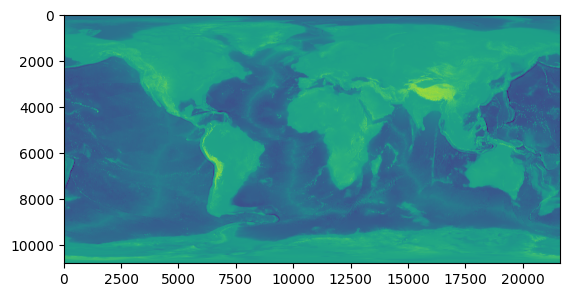

In [ ]:
plt.imshow(image[0])
plt.show()

<Axes: >

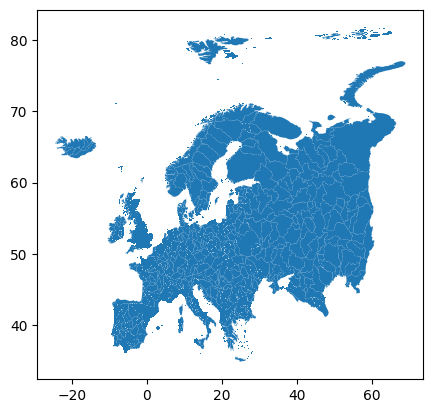

In [ ]:
basins = gpd.read_file("../data/hydrobasins/hydrobasins_europe.shp")
basins.plot()

In [9]:
# colours_i_like = ['#A1CAF1',  '#875692', '#008856',  '#0067A5', '#BE0032',
#                   '#222222', '#848482', '#F3C300',  'blue', '#F38400',
#                   '#E68FAC', '#604E97', '#F3C300', '#B3446C', '#C2B280', 
#                   '#F6A600', '#882D17', '#E25822', '#8DB600',
#                   '#F99379',  '#DCD300', '#F3C300', '#E68FAC', '#C2B280',
#                   '#222222']

# colors_df = pd.DataFrame({'basin': basins.MAJ_NAME.unique().tolist(), 'colors': colours_i_like})
print(len(basins.MAJ_NAME.unique()))

# make a list of 51 unique hexcodes
colors = ['#%02x%02x%02x' % (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(51)]

colors_df = pd.DataFrame({'basin': basins.MAJ_NAME.unique().tolist(), 'colors': colors})


51


In [11]:
# print the column names of the basins dataframe
print(basins.columns)

# print the sub names
print(basins.SUB_NAME.unique())

# print length of the sub names
print(len(basins.SUB_NAME.unique()))

Index(['SUB_BAS', 'TO_BAS', 'MAJ_BAS', 'SUB_NAME', 'MAJ_NAME', 'SUB_AREA',
       'MAJ_AREA', 'LEGEND', 'geometry'],
      dtype='object')
['Miño 2' 'Sil' 'Cavado' 'Mira' 'Douro 3' 'Ricobayo Reservoir'
 'Miranda Reservoir' 'Almendra Reservoir' 'Douro 1' 'Tamega'
 'Entrepenas Reservoir' 'Buendia Reservoir' 'Tagus 2'
 'Valdecanas Reservoir' 'Alcantara Reservoir' 'Tejo' 'Guadiana 2'
 'Orellana Reservoir' 'Serena Reservoir' 'Guadiana 1' 'Alqueva Reservoir'
 'Guadalhorce' 'South Spain Coast' 'Jucar' 'Turia' 'Llobregat'
 'Guadalimar' 'Guadiana Menor' 'Rumblar' 'Jándula' 'Yeguas' 'Guadajoz'
 'Guadiato' 'Bembezar' 'Guadalquivir 1' 'Genil' 'Corbones'
 'Guadalquivir 2' 'Viar' 'Huelva' 'Guadaíra' 'Guadalquivir 3' 'Guadiamar'
 'Guadalquivir Delta' 'Oca / Bayas' 'Zadoya' 'Tiron' 'Cidacos / Najerilla'
 'Ega' 'Arga' 'Irati / Aragon' 'Alhama / Anamaza' 'Arba' 'Jiloca / Jalon'
 'Huerva' 'Gallego' 'Ebro 1' 'Martin' 'Mequinenza' 'Guadalope / Bergantes'
 'Ara' 'Esera' 'Cinca' 'Segre' 'Noguera Ribagorzana'

In [12]:
# print the basin names within geometry -10 to 10
# print(basins[basins.geometry.bounds.minx < -5].SUB_NAME.unique())

print(basins[basins.geometry.bounds.minx < 5].geometry.unique())



<GeometryArray>
[<POLYGON ((-7.542 43.471, -7.542 43.467, -7.533 43.467, -7.533 43.458, -7.52...>,
 <POLYGON ((-6.358 43.058, -6.358 43.054, -6.354 43.054, -6.354 43.05, -6.346...>,
 <POLYGON ((-7.754 41.9, -7.754 41.887, -7.75 41.887, -7.75 41.883, -7.742 41...>,
 <POLYGON ((-8.821 38.046, -8.821 38.042, -8.8 38.042, -8.8 38.033, -8.792 38...>,
 <POLYGON ((-4.425 43.046, -4.425 43.042, -4.408 43.042, -4.408 43.037, -4.4 ...>,
 <POLYGON ((-4.846 43.125, -4.846 43.117, -4.838 43.117, -4.838 43.104, -4.83...>,
 <POLYGON ((-6.213 41.679, -6.213 41.675, -6.208 41.675, -6.208 41.671, -6.2 ...>,
 <POLYGON ((-5.504 41.025, -5.508 41.025, -5.508 41.021, -5.504 41.021, -5.50...>,
 <POLYGON ((-6.904 42.121, -6.904 42.117, -6.896 42.117, -6.896 42.112, -6.89...>,
 <POLYGON ((-7.463 42.167, -7.463 42.154, -7.454 42.154, -7.454 42.142, -7.44...>,
 ...
 <POLYGON ((-15.108 64.254, -15.108 64.25, -15.104 64.25, -15.104 64.246, -15...>,
 <POLYGON ((-14.45 64.55, -14.45 64.546, -14.446 64.546, -14.446 6

In [13]:
# make a list of 840 unique hexcodes
colors = ['#%02x%02x%02x' % (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(840)]

colors_df = pd.DataFrame({'basin': basins.SUB_NAME.unique().tolist(), 'colors': colors})

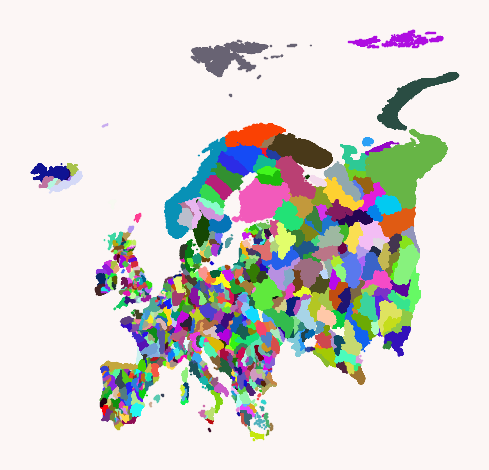

In [14]:
basins = pd.merge(basins, 
                  colors_df, 
                  left_on='SUB_NAME', 
                  right_on='basin', 
                  how='left')

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
basins.plot(ax=ax, 
            edgecolor='face', 
            color=basins['colors'])
ax.axis('off')
plt.tight_layout()
plt.show()

In [17]:
from shapely.geometry import mapping
from rasterio import mask as msk 

sa_array, clipped_transform = msk.mask(img, 
                                       [mapping(geom) for geom in basins[basins.geometry.bounds.minx < 1].geometry.tolist()], 
                                       crop=True)
sa_array, clipped_transform = msk.mask(img, 
                                       [mapping(geom) for geom in basins[basins.geometry.bounds.minx < 1].geometry.tolist()], 
                                       crop=True, 
                                       nodata=(np.amin(sa_array[0]) - 1))

value_range = np.amax(sa_array) + abs(np.amin(sa_array))

In [18]:
geoms = [unary_union(basins.loc[basins['SUB_NAME'] == poly_basin].geometry.tolist()) for poly_basin in basins.SUB_NAME.unique().tolist()]
geoms = [geom.boundary for geom in geoms]

In [19]:
print(geoms)

[<LINESTRING (-7.542 43.471, -7.542 43.467, -7.533 43.467, -7.533 43.458, -7....>, <LINESTRING (-6.358 43.058, -6.358 43.054, -6.354 43.054, -6.354 43.05, -6.3...>, <LINESTRING (-7.754 41.9, -7.754 41.887, -7.75 41.887, -7.75 41.883, -7.742 ...>, <LINESTRING (-8.821 38.046, -8.821 38.042, -8.8 38.042, -8.8 38.033, -8.792 ...>, <LINESTRING (-4.425 43.046, -4.425 43.042, -4.408 43.042, -4.408 43.037, -4....>, <LINESTRING (-4.846 43.125, -4.846 43.117, -4.838 43.117, -4.838 43.104, -4....>, <LINESTRING (-6.213 41.679, -6.213 41.675, -6.208 41.675, -6.208 41.671, -6....>, <LINESTRING (-5.504 41.025, -5.508 41.025, -5.508 41.021, -5.504 41.021, -5....>, <LINESTRING (-6.904 42.121, -6.904 42.117, -6.896 42.117, -6.896 42.112, -6....>, <LINESTRING (-7.463 42.167, -7.463 42.154, -7.454 42.154, -7.454 42.142, -7....>, <LINESTRING (-2.279 41.017, -2.279 41.012, -2.271 41.012, -2.271 41.008, -2....>, <LINESTRING (-2.108 40.675, -2.108 40.671, -2.104 40.671, -2.104 40.667, -2....>, <LINESTRING (-3

In [20]:
new_basins = gpd.GeoDataFrame(pd.DataFrame({'Basin': basins.SUB_NAME.unique().tolist()}), 
                              geometry=geoms)

<Figure size 10000x10000 with 0 Axes>

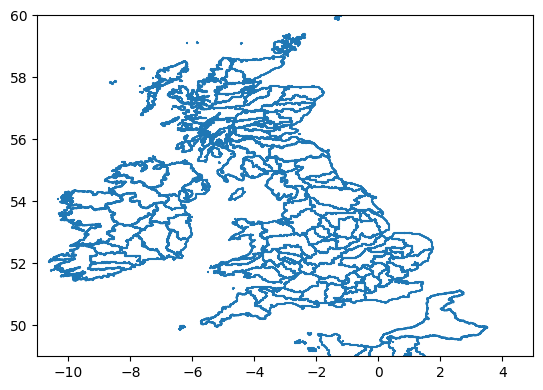

In [21]:
fig = plt.figure(facecolor='#FCF6F5FF', figsize=(100, 100))

# plot basin only in the uk
new_basins.loc[new_basins.geometry.bounds.minx < 1].plot()
# new_basins.plot()
plt.ylim(49, 60)
plt.xlim(-11, 5)
plt.show()

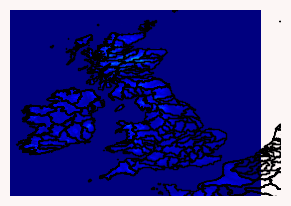

In [22]:
from rasterio.plot import show

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)

show(sa_array, ax=ax, 
     transform=clipped_transform,
     cmap='jet')
new_basins.plot(ax=ax, 
                edgecolor='black', 
                lw=1)

ax.axis('off')
ax.set_ylim(49, 60)
ax.set_xlim(-11, 5)
plt.show()

/var/folders/sc/9_2y0t950z3cbf1xfrh2glh007jfqm/T/ipykernel_17463/1930492223.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  our_cmap = cm.get_cmap('magma', int((value_range - 2500) / 10))


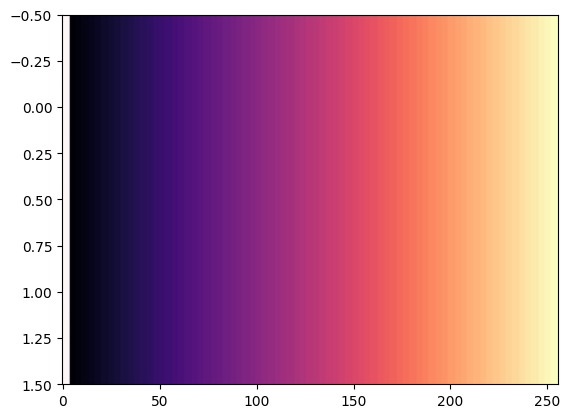

In [23]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
from matplotlib import cm

our_cmap = cm.get_cmap('magma', int((value_range - 2500) / 10))
newcolors = our_cmap(np.linspace(0, 1, int((value_range - 2500) / 10)))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors[:1, :] = background_colour
our_cmap = ListedColormap(newcolors)

bounds = np.arange(np.amin(sa_array), np.amax(sa_array)-2500, 10)
norm = BoundaryNorm(bounds, our_cmap.N)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
plt.imshow(gradient, aspect='auto', cmap=our_cmap)
# plt.axis('off')
plt.show()

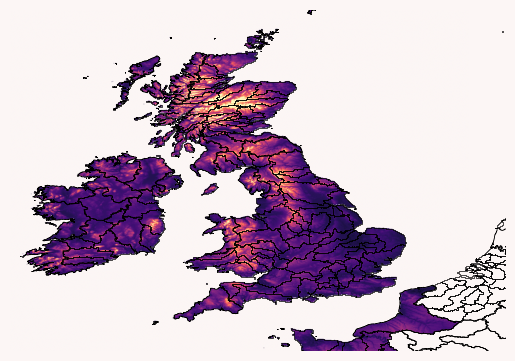

In [26]:
from rasterio.plot import show

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
# fig.set_size_inches(11.7, 8.3)

show(sa_array, ax=ax, 
     transform=clipped_transform, 
     cmap=our_cmap, 
     norm=norm)
new_basins.plot(ax=ax, 
                edgecolor='black', 
                lw=0.5)
ax.axis('off')
ax.set_ylim(49, 60)
ax.set_xlim(-11, 5)
plt.savefig('../figures/uk_basins.pdf', dpi=300)
plt.show()